# Azure Sentinel

* **Author:** Roberto Rodriguez (@Cyb3rWard0g)
* **Notes**: You can run this notebook from BinderHub! On the top right of your screen click on the rocket and then the BinderHub badge.
* **References:**
    * https://github.com/Azure/Azure-Sentinel-Notebooks

## Using MSTICpy

Pre-requisites:

* pip install pandas
* pip install msticpy

### Import Libraries

In [1]:
import os

import pandas as pd
from msticpy.nbtools.wsconfig import WorkspaceConfig
from msticpy.data.data_providers import QueryProvider
os.environ["KQLMAGIC_LOAD_MODE"]="silent"

### Define Connection String
We are going to authenticate to our demo workspace with an AppKey. Therefore, there is no need for you to pass an azure account or authenticate with your credentials! This is a great demo environment to test your notebooks!

In [2]:
connect_str = f"loganalytics://workspace='DEMO_WORKSPACE';appkey='DEMO_KEY';alias='myworkspace'"
qry_prov = QueryProvider("LogAnalytics")
qry_prov.connect(connect_str)

Please wait. Loading Kqlmagic extension...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Native Kqlmagic interface
See https://github.com/Microsoft/jupyter-Kqlmagic

In [3]:
%kql SecurityEvent | take 1

<IPython.core.display.Javascript object>

TenantId,TimeGenerated,SourceSystem,Account,AccountType,Computer,EventSourceName,Channel,Task,Level,EventData,EventID,Activity,PartitionKey,RowKey,StorageAccount,AzureDeploymentID,AzureTableName,AccessList,AccessMask,AccessReason,AccountDomain,AccountExpires,AccountName,AccountSessionIdentifier,AdditionalInfo,AdditionalInfo2,AllowedToDelegateTo,Attributes,AuditPolicyChanges,AuditsDiscarded,AuthenticationLevel,AuthenticationPackageName,AuthenticationProvider,AuthenticationServer,AuthenticationService,AuthenticationType,CACertificateHash,CalledStationID,CallerProcessId,CallerProcessName,CallingStationID,CAPublicKeyHash,CategoryId,CertificateDatabaseHash,ClassId,ClassName,ClientAddress,ClientIPAddress,ClientName,CommandLine,CompatibleIds,DCDNSName,DeviceDescription,DeviceId,DisplayName,Disposition,DomainBehaviorVersion,DomainName,DomainPolicyChanged,DomainSid,EAPType,ElevatedToken,ErrorCode,ExtendedQuarantineState,FailureReason,FileHash,FilePath,FilePathNoUser,Filter,ForceLogoff,Fqbn,FullyQualifiedSubjectMachineName,FullyQualifiedSubjectUserName,GroupMembership,HandleId,HardwareIds,HomeDirectory,HomePath,ImpersonationLevel,InterfaceUuid,IpAddress,IpPort,KeyLength,LmPackageName,LocationInformation,LockoutDuration,LockoutObservationWindow,LockoutThreshold,LoggingResult,LogonGuid,LogonHours,LogonID,LogonProcessName,LogonType,LogonTypeName,MachineAccountQuota,MachineInventory,MachineLogon,MandatoryLabel,MaxPasswordAge,MemberName,MemberSid,MinPasswordAge,MinPasswordLength,MixedDomainMode,NASIdentifier,NASIPv4Address,NASIPv6Address,NASPort,NASPortType,NetworkPolicyName,NewDate,NewMaxUsers,NewProcessId,NewProcessName,NewRemark,NewShareFlags,NewTime,NewUacValue,NewValue,NewValueType,ObjectName,ObjectServer,ObjectType,ObjectValueName,OemInformation,OldMaxUsers,OldRemark,OldShareFlags,OldUacValue,OldValue,OldValueType,OperationType,PackageName,ParentProcessName,PasswordHistoryLength,PasswordLastSet,PasswordProperties,PreviousDate,PreviousTime,PrimaryGroupId,PrivateKeyUsageCount,PrivilegeList,Process,ProcessId,ProcessName,Properties,ProfilePath,ProtocolSequence,ProxyPolicyName,QuarantineHelpURL,QuarantineSessionID,QuarantineSessionIdentifier,QuarantineState,QuarantineSystemHealthResult,RelativeTargetName,RemoteIpAddress,RemotePort,Requester,RequestId,RestrictedAdminMode,RowsDeleted,SamAccountName,ScriptPath,SecurityDescriptor,ServiceAccount,ServiceFileName,ServiceName,ServiceStartType,ServiceType,SessionName,ShareLocalPath,ShareName,SidHistory,Status,SubjectAccount,SubcategoryGuid,SubcategoryId,Subject,SubjectDomainName,SubjectKeyIdentifier,SubjectLogonId,SubjectMachineName,SubjectMachineSID,SubjectUserName,SubjectUserSid,SubStatus,TableId,TargetAccount,TargetDomainName,TargetInfo,TargetLinkedLogonId,TargetLogonGuid,TargetLogonId,TargetOutboundDomainName,TargetOutboundUserName,TargetServerName,TargetSid,TargetUser,TargetUserName,TargetUserSid,TemplateContent,TemplateDSObjectFQDN,TemplateInternalName,TemplateOID,TemplateSchemaVersion,TemplateVersion,TokenElevationType,TransmittedServices,UserAccountControl,UserParameters,UserPrincipalName,UserWorkstations,VirtualAccount,VendorIds,Workstation,WorkstationName,SourceComputerId,EventOriginId,MG,TimeCollected,ManagementGroupName,Type,_ResourceId
ddcfc599-cae0-48ee-9026-2ec12172512f,2020-09-04 15:43:22.283000+00:00,OpsManager,WORKGROUP\JBOX00$,Machine,JBOX00,Microsoft-Windows-Security-Auditing,Security,13312,8,,4688,4688 - A new process has been created.,,,,,,,,,,,,,,,,,,None,None,,,,None,,,,,,,,,,,,,,,"""C:\Program Files\Microsoft Monitoring Agent\Agent\Health Service State\ICT 2\CMF-64/DesiredStateConfiguration\DscRun.exe"" GetInventory ""C:\Program Files\Microsoft Monitoring Agent\Agent\Health Service State\ICT 2\work\Registry.mof"" ""C:\Program Files\Microsoft Monitoring Agent\Agent\Health Service State\ICT 2\work""",,,,,,,,,,,,,None,,,,,,,,,,,,,,,,,,,,None,,,,,,,,,,,None,,,,,S-1-16-16384,,,,,,,,,,,,,,,0x1058,C:\Program Files\Microsoft Monitoring Agent\Agent\Health Service State\ICT 2\CMF-64\D

[{'TenantId': 'ddcfc599-cae0-48ee-9026-2ec12172512f', 'TimeGenerated': datetime.datetime(2020, 9, 4, 15, 43, 22, 283000, tzinfo=tzutc()), 'SourceSystem': 'OpsManager', 'Account': 'WORKGROUP\\JBOX00$', 'AccountType': 'Machine', 'Computer': 'JBOX00', 'EventSourceName': 'Microsoft-Windows-Security-Auditing', 'Channel': 'Security', 'Task': 13312, 'Level': '8', 'EventData': '', 'EventID': 4688, 'Activity': '4688 - A new process has been created.', 'PartitionKey': '', 'RowKey': '', 'StorageAccount': '', 'AzureDeploymentID': '', 'AzureTableName': '', 'AccessList': '', 'AccessMask': '', 'AccessReason': '', 'AccountDomain': '', 'AccountExpires': '', 'AccountName': '', 'AccountSessionIdentifier': '', 'AdditionalInfo': '', 'AdditionalInfo2': '', 'AllowedToDelegateTo': '', 'Attributes': '', 'AuditPolicyChanges': '', 'AuditsDiscarded': None, 'AuthenticationLevel': None, 'AuthenticationPackageName': '', 'AuthenticationProvider': '', 'AuthenticationServer': '', 'AuthenticationService': None, 'AuthenticationType': '', 'CACertificateHash': '', 'CalledStationID': '', 'CallerProcessId': '', 'CallerProcessName': '', 'CallingStationID': '', 'CAPublicKeyHash': '', 'CategoryId': '', 'CertificateDatabaseHash': '', 'ClassId': '', 'ClassName': '', 'ClientAddress': '', 'ClientIPAddress': '', 'ClientName': '', 'CommandLine': '"C:\\Program Files\\Microsoft Monitoring Agent\\Agent\\Health Service State\\ICT 2\\CMF-64/DesiredStateConfiguration\\DscRun.exe" GetInventory "C:\\Program Files\\Microsoft Monitoring Agent\\Agent\\Health Service State\\ICT 2\\work\\Registry.mof" "C:\\Program Files\\Microsoft Monitoring Agent\\Agent\\Health Service State\\ICT 2\\work"', 'CompatibleIds': '', 'DCDNSName': '', 'DeviceDescription': '', 'DeviceId': '', 'DisplayName': '', 'Disposition': '', 'DomainBehaviorVersion': '', 'DomainName': '', 'DomainPolicyChanged': '', 'DomainSid': '', 'EAPType': '', 'ElevatedToken': '', 'ErrorCode': None, 'ExtendedQuarantineState': '', 'FailureReason': '', 'FileHash': '', 'FilePath': '', 'FilePathNoUser': '', 'Filter': '', 'ForceLogoff': '', 'Fqbn': '', 'FullyQualifiedSubjectMachineName': '', 'FullyQualifiedSubjectUserName': '', 'GroupMembership': '', 'HandleId': '', 'HardwareIds': '', 'HomeDirectory': '', 'HomePath': '', 'ImpersonationLevel': '', 'InterfaceUuid': '', 'IpAddress': '', 'IpPort': '', 'KeyLength': None, 'LmPackageName': '', 'LocationInformation': '', 'LockoutDuration': '', 'LockoutObservationWindow': '', 'LockoutThreshold': '', 'LoggingResult': '', 'LogonGuid': '', 'LogonHours': '', 'LogonID': '', 'LogonProcessName': '', 'LogonType': None, 'LogonTypeName': '', 'MachineAccountQuota': '', 'MachineInventory': '', 'MachineLogon': '', 'MandatoryLabel': 'S-1-16-16384', 'MaxPasswordAge': '', 'MemberName': '', 'MemberSid': '', 'MinPasswordAge': '', 'MinPasswordLength': '', 'MixedDomainMode': '', 'NASIdentifier': '', 'NASIPv4Address': '', 'NASIPv6Address': '', 'NASPort': '', 'NASPortType': '', 'NetworkPolicyName': '', 'NewDate': '', 'NewMaxUsers': '', 'NewProcessId': '0x1058', 'NewProcessName': 'C:\\Program Files\\Microsoft Monitoring Agent\\Agent\\Health Service State\\ICT 2\\CMF-64\\DesiredStateConfiguration\\DscRun.exe', 'NewRemark': '', 'NewShareFlags': '', 'NewTime': '', 'NewUacValue': '', 'NewValue': '', 'NewValueType': '', 'ObjectName': '', 'ObjectServer': '', 'ObjectType': '', 'ObjectValueName': '', 'OemInformation': '', 'OldMaxUsers': '', 'OldRemark': '', 'OldShareFlags': '', 'OldUacValue': '', 'OldValue': '', 'OldValueType': '', 'OperationType': '', 'PackageName': '', 'ParentProcessName': 'C:\\Program Files\\Microsoft Monitoring Agent\\Agent\\MonitoringHost.exe', 'PasswordHistoryLength': '', 'PasswordLastSet': '', 'PasswordProperties': '', 'PreviousDate': '', 'PreviousTime': '', 'PrimaryGroupId': '', 'PrivateKeyUsageCount': '', 'PrivilegeList': '', 'Process': 'DscRun.exe', 'ProcessId': '0xdf0', 'ProcessName': '', 'Properties': '', 'ProfilePath': '', 'ProtocolSequence': '', 'ProxyPolicyName': '', 'QuarantineHelpURL': '', 'Quarant

### MSITCPy query interface

In [4]:
alerts_df = qry_prov.exec_query("""
SecurityAlert 
| take 10
""")
print(type(alerts_df))
alerts_df.head(5)

<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>


,TenantId,TimeGenerated,DisplayName,AlertName,AlertSeverity,Description,ProviderName,VendorName,VendorOriginalId,SystemAlertId,...,ExtendedProperties,Entities,SourceSystem,WorkspaceSubscriptionId,WorkspaceResourceGroup,ExtendedLinks,ProductName,ProductComponentName,AlertLink,Type
0,ddcfc599-cae0-48ee-9026-2ec12172512f,2020-06-22 15:32:15+00:00,Suspicious process executed [seen multiple times],Suspicious process executed [seen multiple times],High,Machine logs indicate that the suspicious proc...,MSTIC,Microsoft,9901617c-c26b-4a87-a496-68ab08d37605,2518095455988289169_9901617c-c26b-4a87-a496-68...,...,"{\r\n ""Compromised Host"": ""VICTIM00"",\r\n ""U...","[\r\n {\r\n ""$id"": ""4"",\r\n ""DnsDomain""...",Detection,5733bcb3-7fde-4caf-8629-41dc15e3b352,ch-opsrg-pri,,Azure Security Center,,https://portal.azure.com/#blade/Microsoft_Azur...,SecurityAlert
1,ddcfc599-cae0-48ee-9026-2ec12172512f,2020-06-23 15:36:28+00:00,Suspicious process executed [seen multiple times],Suspicious process executed [seen multiple times],High,Machine logs indicate that the suspicious proc...,MSTIC,Microsoft,249cf59e-56d5-49a8-a7f4-afef445bb5c9,2518094591997622353_249cf59e-56d5-49a8-a7f4-af...,...,"{\r\n ""Compromised Host"": ""VICTIM00"",\r\n ""U...","[\r\n {\r\n ""$id"": ""4"",\r\n ""DnsDomain""...",Detection,5733bcb3-7fde-4caf-8629-41dc15e3b352,ch-opsrg-pri,,Azure Security Center,,https://portal.azure.com/#blade/Microsoft_Azur...,SecurityAlert
2,ddcfc599-cae0-48ee-9026-2ec12172512f,2020-06-25 15:43:07+00:00,Suspicious process executed [seen multiple times],Suspicious process executed [seen multiple times],High,Machine logs indicate that the suspicious proc...,MSTIC,Microsoft,30d669d1-f135-4b8f-9ecd-b865eac8ed34,2518092863996329708_30d669d1-f135-4b8f-9ecd-b8...,...,"{\r\n ""Compromised Host"": ""VICTIM00"",\r\n ""U...","[\r\n {\r\n ""$id"": ""4"",\r\n ""DnsDomain""...",Detection,5733bcb3-7fde-4caf-8629-41dc15e3b352,ch-opsrg-pri,,Azure Security Center,,https://portal.azure.com/#blade/Microsoft_Azur...,SecurityAlert
3,ddcfc599-cae0-48ee-9026-2ec12172512f,2020-06-24 15:39:36+00:00,Suspicious process executed [seen multiple times],Suspicious process executed [seen multiple times],High,Machine logs indicate that the suspicious proc...,MSTIC,Microsoft,1e8d1946-ecba-4b5b-a17f-100933c9078c,2518093727996968682_1e8d1946-ecba-4b5b-a17f-10...,...,"{\r\n ""Compromised Host"": ""VICTIM00"",\r\n ""U...","[\r\n {\r\n ""$id"": ""4"",\r\n ""DnsDomain""...",Detection,5733bcb3-7fde-4caf-8629-41dc15e3b352,ch-opsrg-pri,,Azure Security Center,,https://portal.azure.com/#blade/Microsoft_Azur...,SecurityAlert
4,ddcfc599-cae0-48ee-9026-2ec12172512f,2020-06-26 15:46:36+00:00,Suspicious process executed [seen multiple times],Suspicious process executed [seen multiple times],High,Machine logs indicate that the suspicious proc...,MSTIC,Microsoft,d6bc109d-6f53-48d7-8c9b-4717afedbe44,2518091999994429218_d6bc109d-6f53-48d7-8c9b-47...,...,"{\r\n ""Compromised Host"": ""VICTIM00"",\r\n ""U...","[\r\n {\r\n ""$id"": ""4"",\r\n ""DnsDomain""...",Detection,5733bcb3-7fde-4caf-8629-41dc15e3b352,ch-opsrg-pri,,Azure Security Center,,https://portal.azure.com/#blade/Microsoft_Azur...,SecurityAlert


#### Send queries of arbitrary complexity (using `%%kql` or `msticpy`)

<IPython.core.display.Javascript object>

,EventID,EventCount
0,4688,142482
1,8002,136887
2,4624,52456
3,4672,36501
4,4634,48898


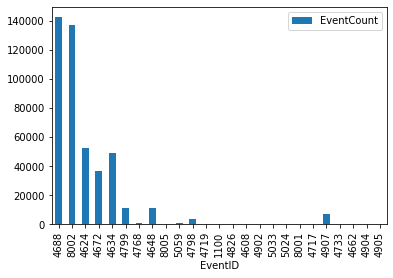

In [5]:
events_df = qry_prov.exec_query("""
SecurityEvent
| where TimeGenerated between (ago(1d) .. now())
| summarize EventCount=count() by EventID
""")
display(events_df.head(5))
events_df.plot.bar(x="EventID")

#### Simple parameterization of queries

<IPython.core.display.Javascript object>

,EventID,EventCount
0,4688,430621
1,8002,414002
2,4624,158420
3,4672,110916
4,4634,147810


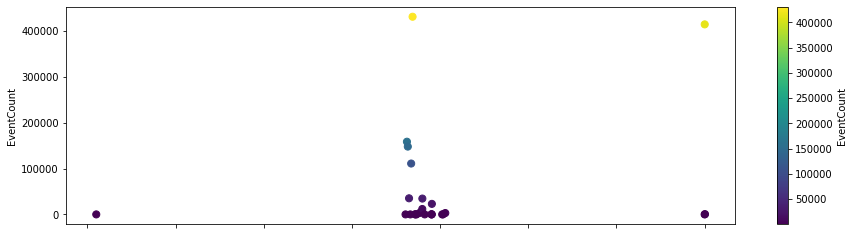

In [6]:
from datetime import datetime, timedelta
param_query = """
SecurityEvent
| where TimeGenerated between (datetime({start}) .. datetime({end}))
| summarize EventCount=count() by EventID
"""

end = datetime.utcnow()
start = end - timedelta(3)

events_df = qry_prov.exec_query(
    param_query.format(start=start, end=end)
)

display(events_df.head(5))
events_df.plot.scatter(x="EventID", y="EventCount", figsize=(15, 4), s=50, c="EventCount", colormap="viridis")